In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [2]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, chem_link, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - chem_link * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - chem_link * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [450]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;

chemical_link = 0.15
electrical_link = 0.02

0.02

In [451]:
time_finish = 5000.0
transient_time = 10000.0
tstep = 0.01
trange = range(0.0, time_finish, step = tstep)
setting_integrate = (alg = Vern9(), adaptive = false, dt = tstep); # Настройки интегратора

In [452]:
u0 = tr[end] # SA[-2.5, 0.0, 0.0, -1.5, 0.0, 0.0]
p = [a, b, c, d, s, xr, r, I, xv, chemical_link, electrical_link]
ds = ContinuousDynamicalSystem(HR,  u0, p)

6-dimensional continuous dynamical system
 state:       [-0.993448, -3.58083, 4.40934, -0.71816, -1.65916, 4.24044]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.15, 0.02]

In [453]:
tr = trajectory(ds, time_finish, Δt = tstep; Ttr = transient_time, diffeq = setting_integrate);

In [454]:
ds = ContinuousDynamicalSystem(HR,  tr[end], p)
Λs = lyapunovspectrum(ds, time_finish; diffeq = setting_integrate)

6-element Vector{Float64}:
   0.020196772914547214
   0.008640908143577165
   0.00014838980883084794
  -0.005831999722486759
  -7.123381832916147
 -10.485849687210507

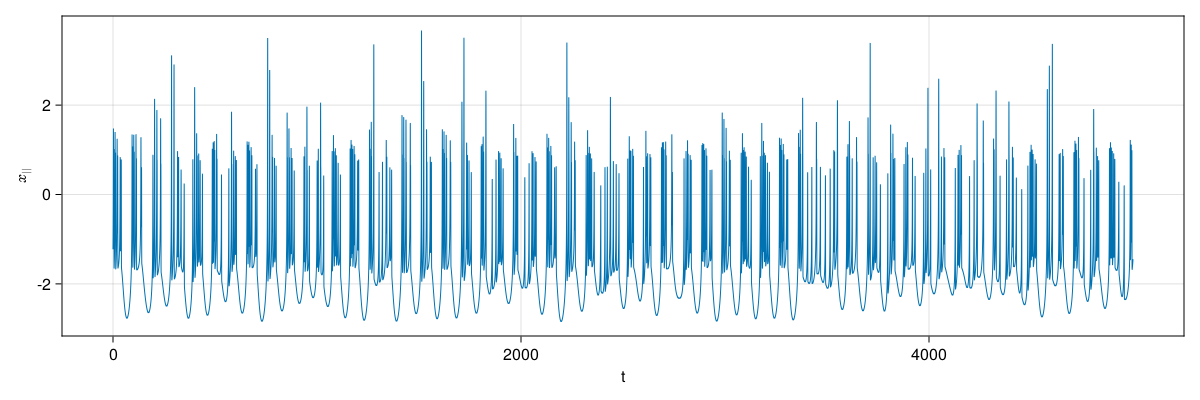

In [455]:
f = Figure(resolution = (1200, 400))
axis = Axis(f[1, 1], xlabel = "t", ylabel = L"x_{||}")
lines!(trange[:], tr[:, 1] + tr[:, 4], linewidth = 1.0)
f

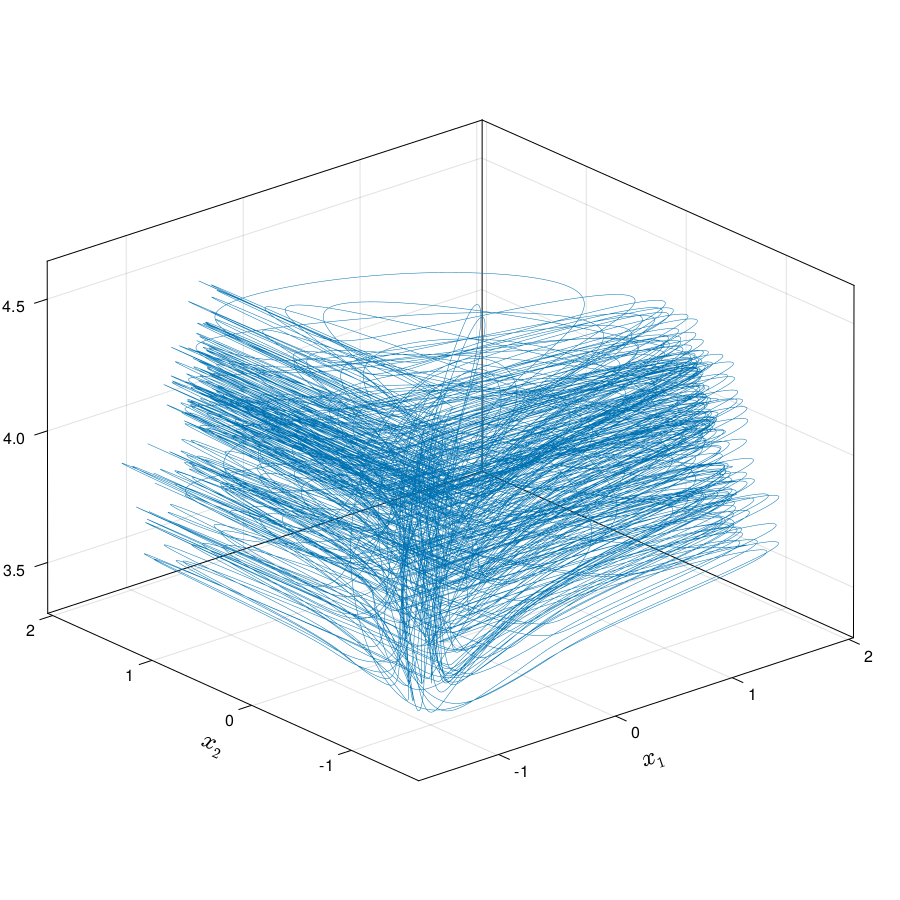

In [456]:
f = Figure(resolution = (900, 900))
axis3 = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"x_2", zlabel = L"z_1",
            xlabelsize = 25, ylabelsize = 25, zlabelsize = 25)
lines!(axis3, tr[:, 1], tr[:, 4], tr[:, 3], linewidth = 0.5)
f